# Pandas

## 1차원 Series, 2차원 dataframe

In [ ]:
import numpy as np
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([[1, 2], [3, 4]])

In [ ]:
df

,0,1
0,1,2
1,3,4


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df)==pd.DataFrame

True

In [ ]:
df.set_index(0)

,1
0,
1,2
3,4


In [ ]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]])

In [ ]:
df

,0,1
0,1,2
1,3,4
2,5,6


In [ ]:
df.columns = ['KOR', 'USA']

In [ ]:
df.index = [17, 18, 19]

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df = pd.DataFrame({'a':[1, 2], 'b':[3, 4]})

In [ ]:
df

,a,b
0,1,3
1,2,4


- 데이터프레임 통계량

In [ ]:
df.mean() # 열 기준으로

a    1.5
b    3.5
dtype: float64

In [ ]:
df.mean().to_frame('mean')

,mean
KOR,3.0
USA,4.0


In [ ]:
df.apply(['mean', 'median', 'sum', 'std'])  # prod

,KOR,USA
mean,3.0,4.0
median,3.0,4.0
sum,9.0,12.0
std,2.0,2.0


## 슬라이스

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df.loc[18:, :]

,KOR,USA
18,3,4
19,5,6


In [ ]:
df.loc[17, :]

KOR    1
USA    2
Name: 17, dtype: int64

In [ ]:
df.loc[17]

KOR    1
USA    2
Name: 17, dtype: int64

- 값 지정

In [ ]:
df

,KOR,USA
17,1,2
18,3,4
19,5,6


In [ ]:
df.loc[18, 'KOR'] = 0

In [ ]:
df

,KOR,USA
17,1,2
18,0,4
19,5,6


In [ ]:
df.loc[:, 'USA'] = 1

In [ ]:
df

,KOR,USA
17,1,1
18,0,1
19,5,1


In [ ]:
df1 = df.loc[18:,:].copy()

In [ ]:
df1.loc[:, :] = [[1, 2], [3, 4]]
df1

,KOR,USA
18,1,2
19,3,4


In [ ]:
df

,KOR,USA
18,1,2
19,3,4


## 멀티인덱스

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'], 'pop':[1, 2, 3, 4], 'gdp':[3, 4, 5, 6]}, index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
from pandas import MultiIndex as MI

In [ ]:
df.index = MI.from_product([['16', '17'], ['미국', '한국']])

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

In [ ]:
df.index = pd.MultiIndex.from_product([['16', '17'], ['미국', '한국']])

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

In [ ]:
df.index = [':'.join(c).strip() for c in df.index.values]

In [ ]:
df

,pop,gdp
16:미국,1,3
16:한국,2,4
17:미국,3,5
17:한국,4,6


In [ ]:
df.index.str.split(':').tolist() # str: 인덱스를 문자열로 간주하게 해서 문자열 메서드 사용 가능

[['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]

라벨이 주어진 형태에 따라 멀티인덱스 생성 함수를 선택


```
- from_tuples() : [['16', '미국'], ['16', '한국'], ['17', '미국'], ['17', '한국']]
- from_product() : [['16', '17'], ['미국', '한국']]
- from_arrays() : [['16', '16', '17', '17'], ['미국', '미국', '한국', '한국']]
```

In [ ]:
df.index = MI.from_tuples(df.index.str.split(':').tolist())

In [ ]:
df

pop  gdp
16 미국    1    3
   한국    2    4
17 미국    3    5
   한국    4    6

IndexSlice: 다양한 층위에서 데이터 선택

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
idx = pd.IndexSlice

In [ ]:
df.loc[idx[:, 'USA'], :]

,,pop,gdp
,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.loc[idx[16, 'USA'], :]

pop    1
gdp    3
Name: (16, USA), dtype: int64

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df['pop'].ge(3)] # ge: >=

,country,pop,gdp
17,USA,3,5
17,KOR,4,6


In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.loc[df.country.isin(['USA', 'JPN'])]

,country,pop,gdp
16,USA,1,3
17,USA,3,5


- droplevels
- get_level_values
- reorder_levels

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df = df.set_index('country', append=True)

In [ ]:
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
df.index.names = ['yr', 'country']

In [ ]:
df

pop  gdp
yr country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
df.index.get_level_values(0).unique()

Index([16, 17], dtype='int64', name='yr')

In [ ]:
df.index.get_level_values(1).unique()

Index(['USA', 'KOR'], dtype='object', name='country')

In [ ]:
df = df.loc[idx[:, 'USA'], :]

In [ ]:
df

,,pop,gdp
yr,country,,
16,USA,1,3
17,USA,3,5


In [ ]:
df.index = df.index.droplevel(level = 1)

In [ ]:
df

,pop,gdp
yr,,
16,1,3
17,3,5


## 연습문제

1.  연도(2017~2020), 국가별(kr, us, jp) 경제성장률과 물가상승률 데이터프레임을 생성하시오
    - 인덱스 첫번째 레벨은 연도, 두번째 레벨은 국가명, 칼럼 라벨은 [gdp, inf]
    - 경제성장률과 물가상승률은 넘파이 랜덤표본 이용

3.  2018년 이후 국가별 경제성장률과 물가상승률을 보이시오

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
list(range(2017, 2021)) * 3

[2017, 2018, 2019, 2020, 2017, 2018, 2019, 2020, 2017, 2018, 2019, 2020]

In [ ]:
['kr'] * 4 + ['us'] * 4 + ['jp'] * 4

['kr', 'kr', 'kr', 'kr', 'us', 'us', 'us', 'us', 'jp', 'jp', 'jp', 'jp']

In [ ]:
ex1 = pd.DataFrame({'yr':list(range(2017, 2021)) * 3,
                    'country':['kr'] * 4 + ['us'] * 4 + ['jp'] * 4,
                    'gdp':np.random.randn(12) + 1,
                    'inf':np.random.randn(12) + 2})
ex1

,yr,country,gdp,inf
0,2017,kr,0.731290,2.126947
1,2018,kr,0.826269,2.502862
2,2019,kr,1.566925,2.794292
3,2020,kr,-0.766412,3.043916
4,2017,us,1.134977,2.513474
5,2018,us,0.126365,-0.610206
6,2019,us,1.046491,3.135422
7,2020,us,1.891498,1.505291
8,2017,jp,0.315119,-0.334759
9,2018,jp,2.591242,0.804197


In [ ]:
ex1 = ex1.set_index(['yr', 'country'])
ex1 = ex1.sort_index()
ex1

gdp       inf
yr   country                    
2017 jp       0.315119 -0.334759
     kr       0.731290  2.126947
     us       1.134977  2.513474
2018 jp       2.591242  0.804197
     kr       0.826269  2.502862
     us       0.126365 -0.610206
2019 jp       1.055114  3.606504
     kr       1.566925  2.794292
     us       1.046491  3.135422
2020 jp       0.759579  1.565419
     kr      -0.766412  3.043916
     us       1.891498  1.505291

In [ ]:
import numpy as np

ex1 = pd.DataFrame({'yr':list(range(2017, 2021)) * 3,
                    'country':['kr'] * 4 + ['us'] * 4 + ['jp'] * 4,
                    'gdp':np.random.randn(12) + 1,
                    'inf':np.random.randn(12) + 2})
ex1 = ex1.set_index(['yr', 'country'])
ex1 = ex1.sort_index()
ex1.loc[2018:]

gdp       inf
yr   country                    
2018 jp       1.457819  0.504065
     kr       0.497973  2.280452
     us      -0.459585  2.788227
2019 jp       1.328652  3.209142
     kr       0.880251  2.604017
     us       0.841283  4.282393
2020 jp       1.269639  1.365522
     kr       2.078062  3.150988
     us       1.026720  0.798215

# 연산

In [ ]:
# 데이터프레임을 병렬로 표시하기 위한 함수 정의
from IPython.display import display_html
def display_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
df = pd.DataFrame({'KOR':[1, 3], 'USA':[2, 4]})
df

,KOR,USA
0,1,2
1,3,4


In [ ]:
df1 = df + 10
df1

,KOR,USA
0,11,12
1,13,14


In [ ]:
df1.columns = ['USA', 'CHN']
df1

,USA,CHN
0,11,12
1,13,14


In [ ]:
df

,KOR,USA
0,1,2
1,3,4


In [ ]:
display_by_side(df1, df + df1)

USA 
 CHN 
 
 
 
 
 0 
 11 
 12 
 
 
 1 
 13 
 14 
 
 
 
 
 
 
 CHN 
 KOR 
 USA 
 
 
 
 
 0 
 NaN 
 NaN 
 13 
 
 
 1 
 NaN 
 NaN 
 17

In [ ]:
df + df1

,CHN,KOR,USA
0,NaN,NaN,13
1,NaN,NaN,17


In [ ]:
display_by_side(df, df.T)

,KOR,USA
0,1,2
1,3,4
,0,1
KOR,1,3
USA,2,4


In [ ]:
df.dot(df.T)

,0,1
0,5,11
1,11,25


In [ ]:
df.T.dot(df)

,KOR,USA
KOR,10,14
USA,14,20


In [ ]:
display_by_side(df, df)

,KOR,USA
0,1,2
1,3,4
,KOR,USA
0,1,2
1,3,4


In [ ]:
df.dot(df) # 행과 열의 이름이 다름

ValueError: matrices are not aligned

In [ ]:
df1 = pd.DataFrame({'USA':[1, 3], 'CHN':[2, 4]})
df2 = pd.DataFrame({'JPN':[2, 4], 'KOR':[6, 8]})

In [ ]:
display_by_side(df1, df2)

,USA,CHN
0,1,2
1,3,4
,JPN,KOR
0,2,6
1,4,8


In [ ]:
pd.concat([df1, df2], axis = 1) # 열 방향 병합

,USA,CHN,JPN,KOR
0,1,2,2,6
1,3,4,4,8


In [ ]:
pd.concat([df1, df2], axis = 0) # 행 방향 병합

,USA,CHN,JPN,KOR
0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,NaN
0,NaN,NaN,2.0,6.0
1,NaN,NaN,4.0,8.0


In [ ]:
df3 = pd.DataFrame({'USA': [2, 4], 'CHN': [3, 5]})
display_by_side(df1, df3)

,USA,CHN
0,1,2
1,3,4
,USA,CHN
0,2,3
1,4,5


In [ ]:
pd.concat([df1, df3], axis = 0)

,USA,CHN
0,1,2
1,3,4
0,2,3
1,4,5


## merge, concat



In [ ]:
df2.columns = ['CHN', 'KOR']
df2

,CHN,KOR
0,2,6
1,4,8


In [ ]:
df1

,USA,CHN
0,1,2
1,3,4


In [ ]:
df1.merge(df2, on = 'CHN')

,USA,CHN,KOR
0,1,2,6
1,3,4,8


## add, sub, mul, div

In [ ]:
df

,KOR,USA
0,1,2
1,3,4


In [ ]:
df['Total'] = df.sum(axis = 1) # 각 행의 원소를 모두 더해서 새로운 열 생성
df

,KOR,USA,Total
0,1,2,3
1,3,4,7


In [ ]:
df.add(df)

,KOR,USA,Total
0,2,4,6
1,6,8,14


In [ ]:
df.sub(df)

,KOR,USA,Total
0,0,0,0
1,0,0,0


In [ ]:
df.mul(df)

,KOR,USA,Total
0,1,4,9
1,9,16,49


In [ ]:
df.div(df.Total, axis = 0) # 행 기준으로 df.Total 각 원소 값으로 나눈다

,KOR,USA,Total
0,0.333333,0.666667,1.0
1,0.428571,0.571429,1.0


## cut

- 숫자 데이터를 범주형(category) 데이터로 변환
- 데이터프레임 값을 미리 정의된 범위(ranges)에 따라 나눌 경우 pd.cut(df.var, ranges) 이용

In [ ]:
from numpy.random import randint
df = pd.DataFrame({'a':range(4), 'b':randint(1,10,4)})
df

,a,b
0,0,8
1,1,7
2,2,1
3,3,7


In [ ]:
pd.cut(df.b, [0, 7, 10])

0    (7, 10]
1     (0, 7]
2     (0, 7]
3     (0, 7]
Name: b, dtype: category
Categories (2, interval[int64, right]): [(0, 7] < (7, 10]]

In [ ]:
df.loc[:, 'c'] = pd.cut(df.b, [0, 7, 10], labels=False) # pd.cut( , , labels=False)는 범주 대신 숫자(구간 순서) 반환

In [ ]:
df

,a,b,c
0,0,8,1
1,1,7,0
2,2,1,0
3,3,7,0


## groupby: 특정 열을 기준으로 데이터프레임을 그룹으로 나누어 원하는 작업 수행

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

In [ ]:
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df.groupby('country').mean()

,pop,gdp
country,,
KOR,3.0,5.0
USA,2.0,4.0


In [ ]:
df = df[['pop', 'gdp']]
df

,pop,gdp
16,1,3
16,2,4
17,3,5
17,4,6


## 특정 열이 아니라 값이 속한 범주에 따라 그룹지정

In [ ]:
df.groupby(pd.cut(df['pop'], [0, 2, 4]))['gdp'].mean()

pop
(0, 2]    3.5
(2, 4]    5.5
Name: gdp, dtype: float64

## lambda 함수
- apply, applymap과 함께 사용

In [ ]:
square = lambda x: x * x

In [ ]:
square(2)

4

## apply/applymap: apply는 열이나 행에 함수 적용, applymap은 각 요소에 함수 적용

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])
df

,country,pop,gdp
16,USA,1,3
16,KOR,2,4
17,USA,3,5
17,KOR,4,6


In [ ]:
df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [ ]:
df = df[['pop', 'gdp']].apply(lambda x: x.div(x.sum()))
df

,pop,gdp
16,0.1,0.166667
16,0.2,0.222222
17,0.3,0.277778
17,0.4,0.333333


In [ ]:
df.applymap(lambda x: f'{x:.2f}')

,pop,gdp
16,0.10,0.17
16,0.20,0.22
17,0.30,0.28
17,0.40,0.33


## stack/unstack
- 데이터프레임의 데이터 구조를 재구성
- 데이터프레임의 특정 행 또는 열을 다른 축(axis)로 이동할 때,
- 만약 행 또는 열이 멀티인덱스인 경우 이동하려는 행 또는 열의 레벨을 지정

In [ ]:
df = pd.DataFrame({'country':['USA', 'KOR', 'USA', 'KOR'],
                   'pop':[1, 2, 3, 4],
                   'gdp':[3, 4, 5, 6]},
                  index = [16, 16, 17, 17])

df = df.set_index('country', append=True)
df

pop  gdp
   country          
16 USA        1    3
   KOR        2    4
17 USA        3    5
   KOR        4    6

In [ ]:
df.unstack(level = 1) # 두번째 index를 열로

pop     gdp    
country KOR USA KOR USA
16        2   1   4   3
17        4   3   6   5

In [ ]:
df = df.unstack(level = 1)

In [ ]:
df.stack(level = 1) # 열을 행으로

pop  gdp
   country          
16 KOR        2    4
   USA        1    3
17 KOR        4    6
   USA        3    5

# 시계열
- 데이터프레임의 인덱스를 DatetimeIndex 자료형으로 지정하면 시계열 빈도 변경(resample), 증가율/차분(pct_change()/diff()
- 특정 연도/월 선택 등 시계열 분석에 유용한 기능 제공

In [ ]:
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'])

In [ ]:
df

,con,gdp
0,7,10
1,1,10
2,1,14
3,8,7
4,16,7
5,17,2
6,1,17
7,8,19
8,6,10
9,8,13


## pd.date_range(start=, end=, freq=), pd.to_datetime()

In [ ]:
df.index = pd.date_range(start = '2017-3-31', end = '2019-12-31', freq='Q')

In [ ]:
df

,con,gdp
2017-03-31,7,10
2017-06-30,1,10
2017-09-30,1,14
2017-12-31,8,7
2018-03-31,16,7
2018-06-30,17,2
2018-09-30,1,17
2018-12-31,8,19
2019-03-31,6,10
2019-06-30,8,13


In [ ]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## resample

In [ ]:
df.resample('A').sum()

,con,gdp
2017-12-31,17,41
2018-12-31,42,45
2019-12-31,32,40


In [ ]:
df.resample('A').last()

,con,gdp
2017-12-31,8,7
2018-12-31,8,19
2019-12-31,11,1


In [ ]:
df.resample('A').mean()

,con,gdp
2017-12-31,4.25,10.25
2018-12-31,10.50,11.25
2019-12-31,8.00,10.00


matplotlib

## simple graph

<Axes: >

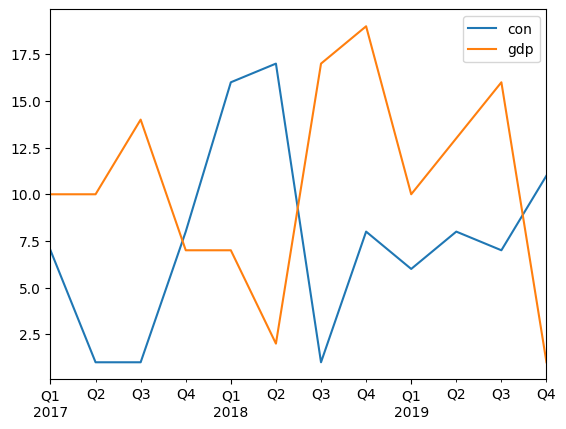

In [ ]:
df.plot()

<Axes: >

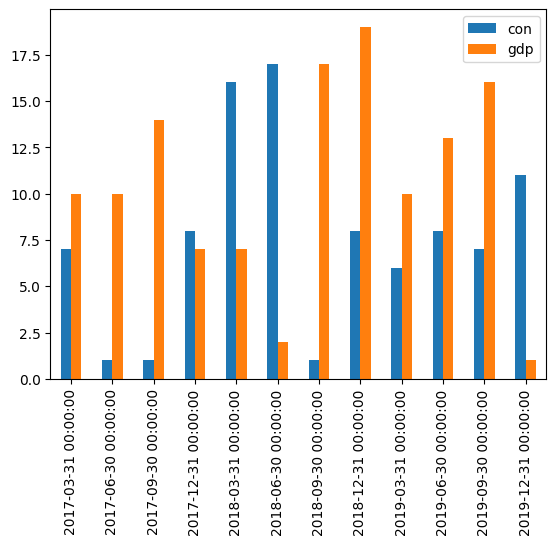

In [ ]:
df.plot.bar()

<Axes: >

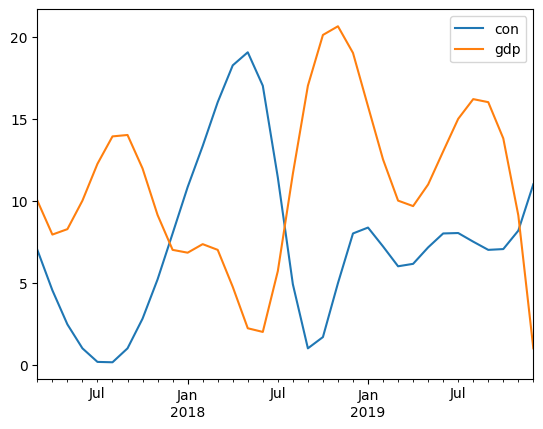

In [ ]:
df.resample('M').interpolate(method='cubic').plot() # 누락된 데이터를 추정하여 채움
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

<Axes: >

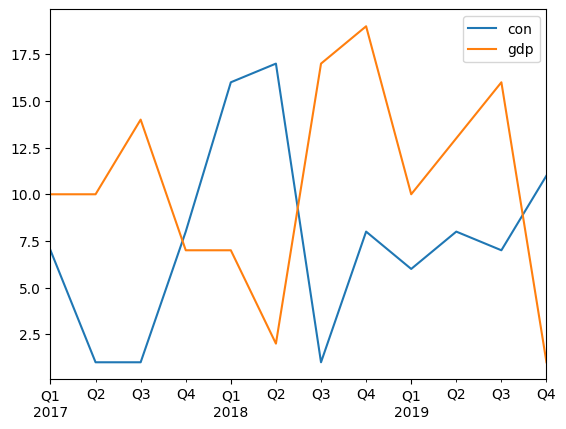

In [ ]:
df.plot()
# ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})

In [ ]:
df

,value,date
0,2,20201201
1,4,2019-9-1
2,5,1 jul 2018
3,6,2017q1


In [ ]:
df.date = pd.to_datetime(df.date, format='mixed')

In [ ]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [ ]:
df = df.set_index('date')

In [ ]:
df

,value
date,
2020-12-01,2
2019-09-01,4
2018-07-01,5
2017-01-01,6


In [ ]:
df = df.sort_index() # 오름차순으로 정렬
df

,value
date,
2017-01-01,6
2018-07-01,5
2019-09-01,4
2020-12-01,2


- 전기 대비 증가율, 차분 등 함수를 원래 의도대로 적용하기 위해서는 데이터프레임의 데이트타임인덱스가 빠짐없이 순서대로 정렬되어야 함
- date_range()로 전체 샘플기간에 대한 데이터타임인덱스를 생성한 후 데이터프레임의 reindex(index)를 이용하여 적용

In [ ]:
df.pct_change()

,value
date,
2017-01-01,NaN
2018-07-01,-0.166667
2019-09-01,-0.200000
2020-12-01,-0.500000


## offsets: YearEnd(), YearBegin(), QuaterEnd(), QuaterBegin(), MonthEnd(), MonthBegin()
- 날짜 표기를 일치시킬 때 사용

In [ ]:
from pandas.tseries.offsets import YearEnd, YearBegin, QuarterEnd, QuarterBegin

In [ ]:
df

,value
date,
2017-01-01,6
2018-07-01,5
2019-09-01,4
2020-12-01,2


In [ ]:
df.index = df.index + YearEnd()
df

,value
date,
2017-12-31,6
2018-12-31,5
2019-12-31,4
2020-12-31,2


In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date, format='mixed')
df = df.set_index('date')
df = df.sort_index()
df

,value
date,
2017-01-01,6
2018-07-01,5
2019-09-01,4
2020-12-01,2


In [ ]:
df.index = df.index + QuarterEnd()
df

,value
date,
2017-03-31,6
2018-09-30,5
2019-09-30,4
2020-12-31,2


데이트타임에서 연도, 분기, 월 추출

In [ ]:
df = pd.DataFrame({'value':[2, 4, 5, 6], 'date':['20201201', '2019-9-1', '1 jul 2018', '2017q1']})
df.date = pd.to_datetime(df.date, format='mixed')

In [ ]:
df

,value,date
0,2,2020-12-01
1,4,2019-09-01
2,5,2018-07-01
3,6,2017-01-01


In [ ]:
df['month'] = df.date.dt.month

In [ ]:
df

,value,date,month
0,2,2020-12-01,12
1,4,2019-09-01,9
2,5,2018-07-01,7
3,6,2017-01-01,1


In [ ]:
df['day'] = df.date.dt.day

In [ ]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


# save/read

In [ ]:
pwd # print working directory

'/content'

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import os
os.mkdir('pickles')

## to_pickle()

- python에서 매우 효율적임

In [ ]:
ls # 현재 디렉토리에 있는 파일과 서브 디렉토리 표시

pickles/  sample_data/


In [ ]:
os.listdir()

['.config', 'pickles', 'sample_data']

In [ ]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


In [ ]:
df.to_pickle('pickles/df.pkl')

In [ ]:
ls pickles/

df.pkl


In [ ]:
os.listdir('pickles')

['df.pkl']

In [ ]:
df1 = pd.read_pickle('pickles/df.pkl')

In [ ]:
df1

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


## to_csv()

In [ ]:
df.to_csv('df.csv')
df_csv = pd.read_csv('df.csv', index_col=0)

In [ ]:
df_csv

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


## to_excel()

In [ ]:
df.to_excel('df.xlsx')

## save multiple dataframes

In [ ]:
df

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


In [ ]:
df1

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


In [ ]:
df2

,CHN,KOR
0,2,6
1,4,8


In [ ]:
dfs = {'df': df, 'df1': df1, 'df2': df2}

In [ ]:
import pickle

In [ ]:
with open('dfs.pkl', 'wb') as handle:
    pickle.dump(dfs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('dfs.pkl', 'rb') as handle:
    dfs_pkl = pickle.load(handle)

In [ ]:
dfs_pkl['df']

,value,date,month,day
0,2,2020-12-01,12,1
1,4,2019-09-01,9,1
2,5,2018-07-01,7,1
3,6,2017-01-01,1,1


# matplotlib: 시각화 라이브러리

<Axes: >

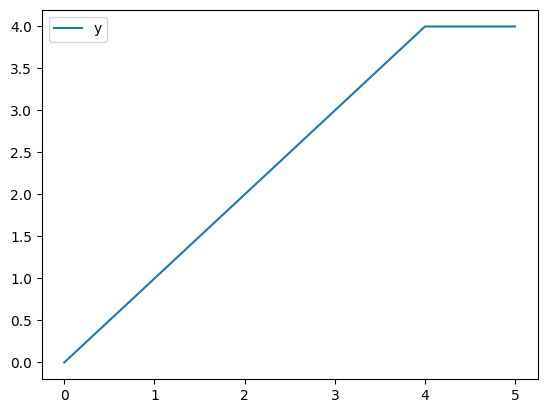

In [3]:
import pandas as pd

df = pd.DataFrame([0, 1, 2, 3, 4, 4], columns = ['y'])
df.plot()

In [ ]:
# %matplotlib notebook

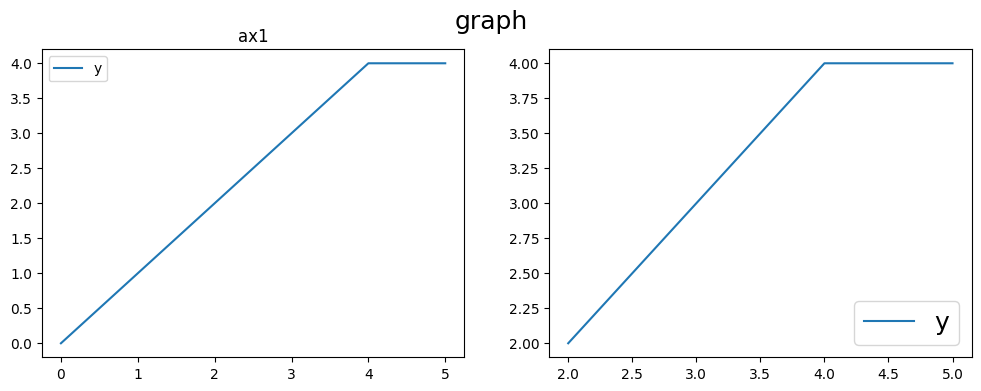

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc='lower right', fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

## x, y-axis

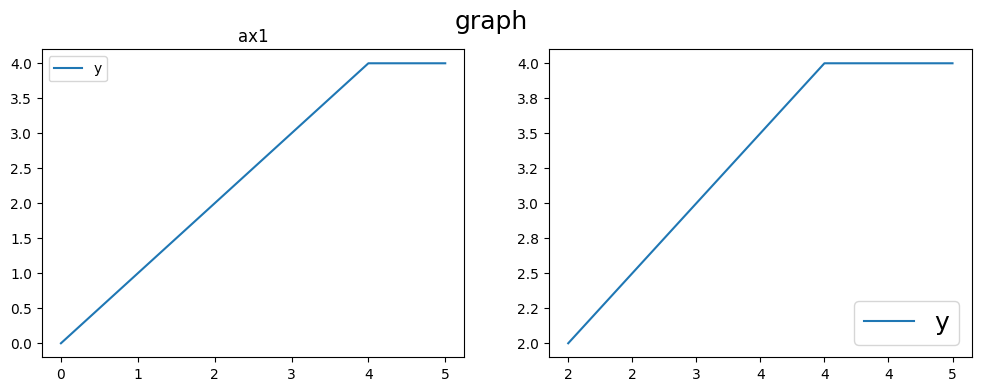

In [6]:
from matplotlib.ticker import FuncFormatter as FF

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df.plot(ax=ax[0])
df.loc[2:].plot(ax=ax[1])
ax[1].legend(loc=4, fontsize=18)
ax[0].set_title('ax1')
fig.suptitle('graph', fontsize=18);

dp1 = lambda x, p: '{:,.1f}'.format(x)
dp0 = lambda x, p: '{:,.0f}'.format(x)
ax[1].yaxis.set_major_formatter(FF(dp1))
ax[1].xaxis.set_major_formatter(FF(dp0))

In [ ]:
df

,y
0,0
1,1
2,2
3,3
4,4
5,4


<Axes: xlabel='x', ylabel='y'>

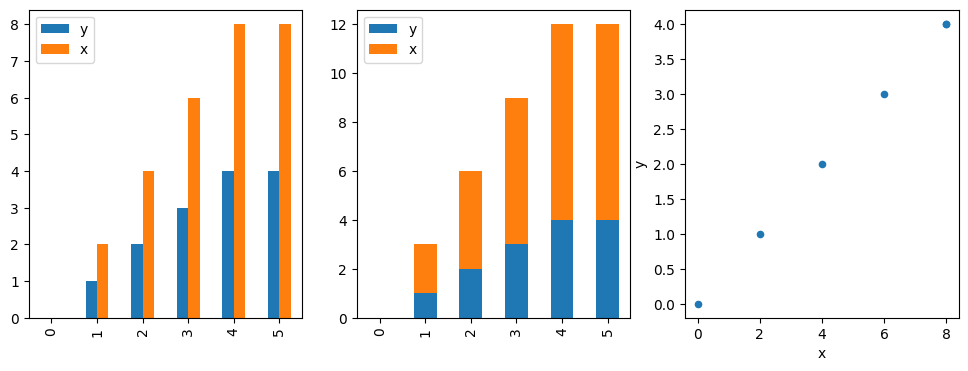

In [ ]:
df['x'] = df['y'] * 2

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df.plot.bar(ax=ax[0])
df.plot.bar(stacked=True, ax=ax[1])
df.plot.scatter(x='x', y='y', ax=ax[2])

## bar chart

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1, 20, 24).reshape(12, 2), columns=['con', 'gdp'],
                  index = pd.date_range('2017-3-31', '2019-12-31', freq='Q'))
df

,con,gdp
2017-03-31,14,14
2017-06-30,1,8
2017-09-30,15,2
2017-12-31,3,1
2018-03-31,13,13
2018-06-30,2,9
2018-09-30,15,3
2018-12-31,4,14
2019-03-31,8,7
2019-06-30,13,5


<Axes: >

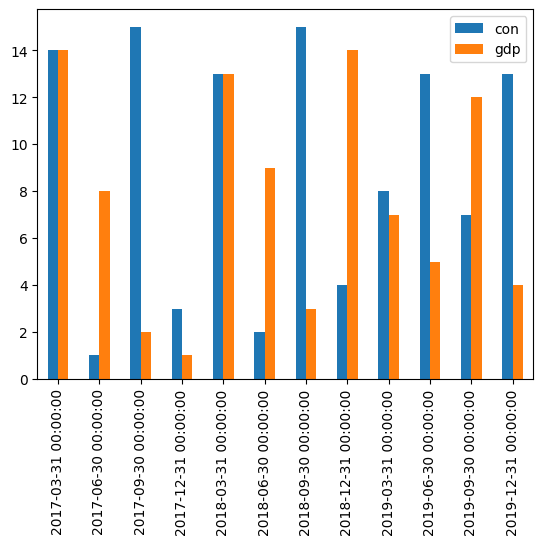

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

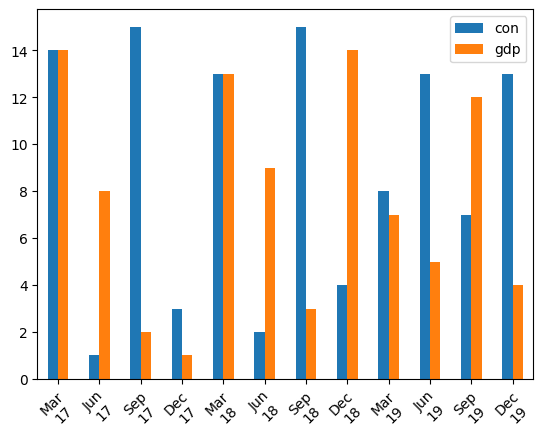

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

ticklabels = [pd.to_datetime(t.get_text()).strftime('%b\n%y') for t in ax.get_xticklabels()]
#ticklabels = [pd.to_datetime(t.get_text()).strftime('%y\n%m') for t in ax.get_xticklabels()]
ax.set_xticklabels(ticklabels, rotation=45);

In [ ]:
def xaxis_date_format(ax, fmt = '%y'):
    '''fmt: '%b\n%y', '%y-%m-%d', etc '''
    ticklabels = [pd.to_datetime(t.get_text()).strftime(fmt) for t in ax.get_xticklabels()]
    ax.set_xticklabels(ticklabels, rotation=0)

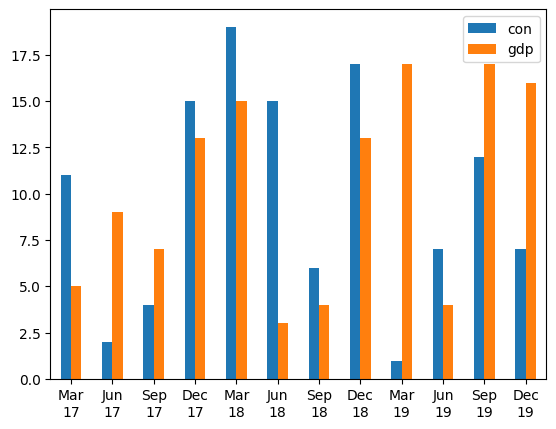

In [ ]:
fig, ax = plt.subplots(1, 1)

df.plot.bar(ax=ax)

#ticklabels = [pd.to_datetime(t.get_text()).strftime('%b\n%y') for t in ax.get_xticklabels()]
xaxis_date_format(ax, fmt = '%b\n%y')

## 한글

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


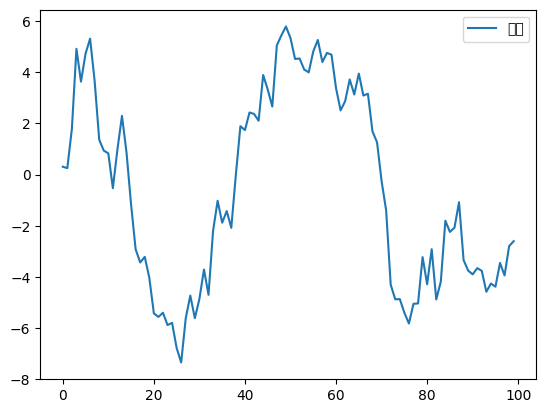

In [14]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [15]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[]

나눔글꼴 설치(리눅스)

In [16]:
!apt-get -y install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (36.9 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


matplotlib가 사용할 수 있는 폰트 리스트를 재구성하고, 코랩 재시작

In [2]:
!pip show matplotlib

Name: matplotlib
Version: 3.9.0
Summary: Python plotting package
Home-page: 
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby grants Licensee a nonexclusive, royalty-free, world-wide license
        to reproduce, analyze, test, perform and/or display publicly, prepare
        derivative works, distribute, and otherwise use matplotlib
        alone or in any derivative version, provided, however, that MDT's
        License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
        2012- Matplot

In [2]:
!pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
import os
import matplotlib.font_manager as fm

fm._rebuild()
#fm._load_fontmanager()
os.kill(os.getpid(), 9)

현재 matplotlib가 사용할 수 있는 한글폰트 확인

In [1]:
import matplotlib.font_manager as fm
[f for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', name='NanumBarunGothic', style='normal', variant='normal', weight=600, stretch='normal', size='scalable'),
 FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', name='NanumSquareRound', style='normal', variant='normal', weight=700, stretch='normal', size='scalable'),
 FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', name='NanumSquare', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', name='NanumSquareRound', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', name='NanumGothicCoding', style='no

matplotlib에서 사용하려는 한글 폰트 지정하고, 그래프의 마이너스 라벨이 제대로 표시되도록 설정

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

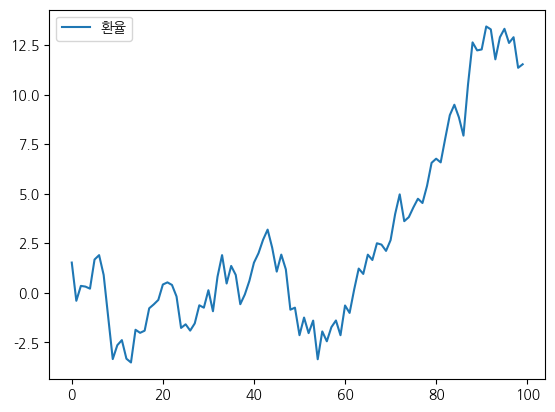

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(100).cumsum(), columns=['환율'])
df.plot()

# 연습문제

1. 성인 500명에 대한 키(cm)와 몸무게(kg) 데이터를 아래 관계에 따라 데이터프레임으로 생성하시오

$height \sim norm(170, 15)$

$weight = (height - 100){1.2} + u$, $u \sim norm(0, 5)$

2. 키와 몸무게 각각에 대한 히스토그램(5 kg/cm 구간)을 subplots을 이용하여 그리시오

3. 키 180cm 이상 및 이하로 그룹을 나누어 키와 몸무게의 산포도를 그리시오

h    214.442276
w    144.384974
dtype: float64
h    118.402035
w     19.242464
dtype: float64


<Axes: xlabel='h', ylabel='w'>

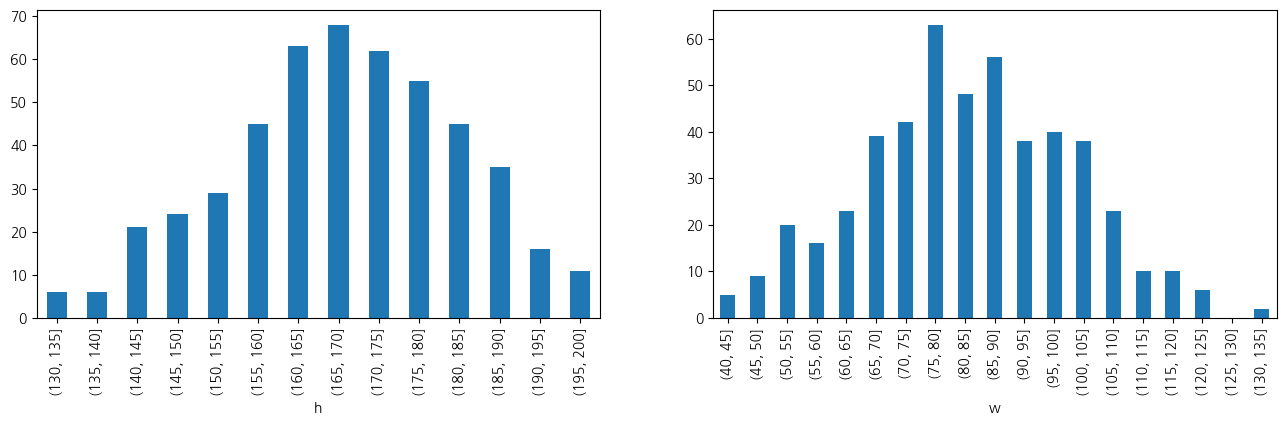

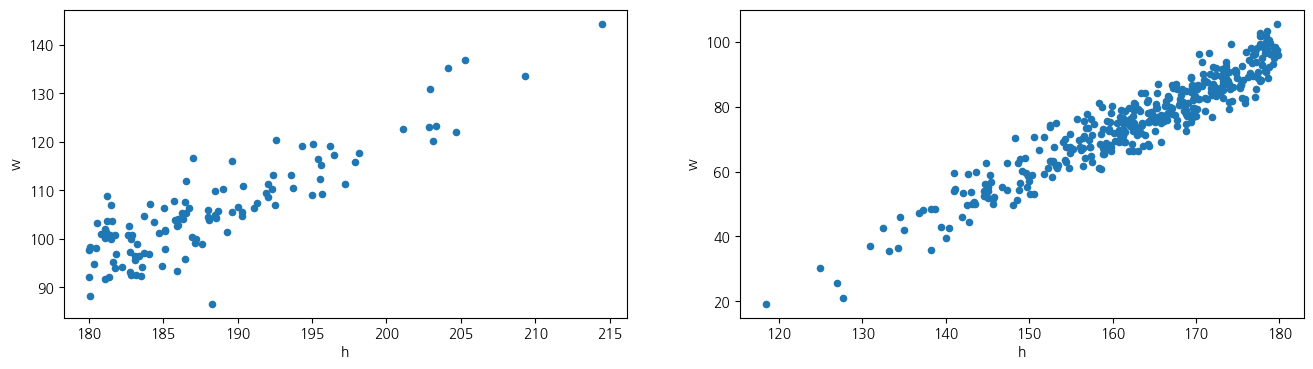

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 500
h = np.random.normal(170, 15, N)
w = (h - 100) * 1.2 + np.random.normal(0, 5, N)

hw = pd.DataFrame({'h':h, 'w':w})
print(hw.max())
print(hw.min())

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hw.groupby(pd.cut(hw.h, list(range(130, 205, 5))))['h'].count().plot.bar(ax=ax[0])
hw.groupby(pd.cut(hw.w, list(range(40, 140, 5))))['w'].count().plot.bar(ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
hw.loc[hw.h.ge(180)].plot.scatter(x='h', y='w', ax=ax[0])
hw.loc[hw.h.lt(180)].plot.scatter(x='h', y='w', ax=ax[1])